In [1]:
import geopandas as gpd

import pandas as pd
import pyam
import numpy as np

import data_shepherd as ds
from data_shepherd import utils

from pandas_indexing import *


import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from matplotlib import patches as mpatches
import seaborn as sns

ca_colors = ['#95AD28','#2C8090','#F0280E','#F0CF1C','#1478B0','#59C954','#059E73','#945EB0','#383836','#828282','#C2C2C2']
ca_colors = sns.color_palette(ca_colors)
ca_colors

from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Lato']

sns.set_palette(ca_colors)

<IPython.core.display.Javascript object>

Remote: (17) new sources and (2) updated sources are available online (see dt.available_remote_data_updates)
Looking for new online sources in the backgound


In [2]:
regions = ['R5OECD','R5ASIA','R10AFRICA','R10LATIN_AM','R10REF_ECON','R10MIDDLE_EAST','World']
region_names = ['OECD','Asia','Sub-Saharan Africa','Latin America and the Caribbean','Eurasia','Middle East and North Africa','World']

In [3]:
remind_map = ds.utils.RegionMapping.from_model('R10_REMIND_2.1').iso_to_region

oecd_isos = list(remind_map.loc[remind_map.isin(['R10EUROPE','R10NORTH_AM','R10PAC_OECD','R10ROWO'])].index)
asia_isos = list(remind_map.loc[remind_map.isin(['R10CHINA+','R10INDIA+','R10REST_ASIA'])].index)
africa_isos = list(remind_map.loc[remind_map.isin(['R10AFRICA'])].index)
latam_isos = list(remind_map.loc[remind_map.isin(['R10LATIN_AM'])].index)
ref_isos = list(remind_map.loc[remind_map.isin(['R10REF_ECON'])].index)
mideast_isos = list(remind_map.loc[remind_map.isin(['R10MIDDLE_EAST'])].index)

r10_to_r6 = dict(zip(
    ['R10EUROPE','R10NORTH_AM','R10PAC_OECD','R10ROWO','R10CHINA+','R10INDIA+','R10REST_ASIA','R10AFRICA','R10LATIN_AM','R10REF_ECON','R10MIDDLE_EAST'],
    ['R5OECD','R5OECD','R5OECD','R5OECD','R5ASIA','R5ASIA','R5ASIA','R10AFRICA','R10LATIN_AM','R10REF_ECON','R10MIDDLE_EAST'],))

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.set_index(['iso_a3'],inplace=True)
world['r10_region'] = world.index.map(ds.utils.RegionMapping.from_model('R10_REMIND_2.1').iso_to_region)
world['r6_region'] = world['r10_region'].map(r10_to_r6)
world['r6_name'] = world['r6_region'].map(dict(zip(regions,region_names)))
world = world.loc[world.continent != 'Antarctica']

/var/folders/xk/vygfhzl96q14r4jk50g8b90r0000gn/T/ipykernel_28834/320436426.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


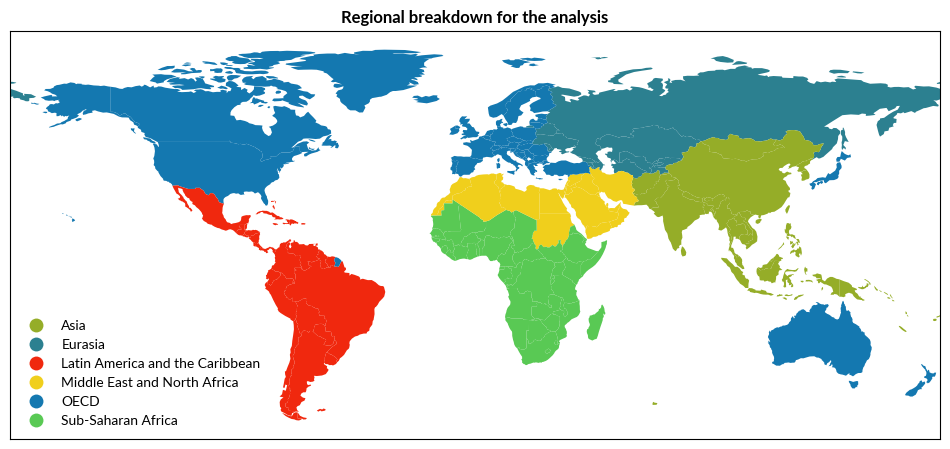

In [6]:
f, ax = plt.subplots(figsize=(12,18))
world.plot(column='r6_name',ax = plt.gca(),
           cmap=ListedColormap(ca_colors[:6]),
           legend=True,
           legend_kwds={'loc': 'lower left',
                       'edgecolor':'w',
                        'framealpha':0,
                       'fontsize':10})

ax.set_xlim([-180,180])
ax.set_title('Regional breakdown for the analysis', fontweight='bold')
ax.tick_params(
    axis='both',          
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False)
